In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Configuring styles
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [50]:
df=pd.read_csv('Malaria_Dataset.csv',index_col=0)

In [51]:
df.head()

,MIN_TEMP,MAX_TEMP,AVG_TEMP,KARAMA_Rain,NYAMATA_Rain,JURU_Rain,RAIN_AVG,POPULATION,Year,Month,Malaria_Counts,HUMIDITY,Target
2012-Jan,14.319355,29.206452,21.762903,0.0,80.0,42.0,40.666667,361914,2012,1,4567,NaN,0
2012-Feb,13.251724,27.924138,20.587931,74.0,77.0,79.0,76.666667,361914,2012,2,4497,NaN,0
2012-Mar,14.029032,27.164516,20.596774,77.0,49.0,114.0,80.000000,361914,2012,3,2897,NaN,0
2012-Apr,14.763333,26.276667,20.520000,160.0,42.0,229.0,143.666667,361914,2012,4,6254,NaN,1
2012-May,13.909677,25.887097,19.898387,150.0,101.0,173.0,141.333333,361914,2012,5,11380,NaN,1


In [52]:
data=df.copy()
dat=data[data['Malaria_Counts']<22000]

In [53]:
dat['Malaria_Ratio']=dat['Malaria_Counts']/dat['POPULATION']
dat

C:\Users\nijas2012\.conda\envs\janvierAI\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,MIN_TEMP,MAX_TEMP,AVG_TEMP,KARAMA_Rain,NYAMATA_Rain,JURU_Rain,RAIN_AVG,POPULATION,Year,Month,Malaria_Counts,HUMIDITY,Target,Malaria_Ratio
2012-Jan,14.319355,29.206452,21.762903,0.0,80.0,42.0,40.666667,361914,2012,1,4567,NaN,0,0.012619
2012-Feb,13.251724,27.924138,20.587931,74.0,77.0,79.0,76.666667,361914,2012,2,4497,NaN,0,0.012426
2012-Mar,14.029032,27.164516,20.596774,77.0,49.0,114.0,80.000000,361914,2012,3,2897,NaN,0,0.008005
2012-Apr,14.763333,26.276667,20.520000,160.0,42.0,229.0,143.666667,361914,2012,4,6254,NaN,1,0.017280
2012-May,13.909677,25.887097,19.898387,150.0,101.0,173.0,141.333333,361914,2012,5,11380,NaN,1,0.031444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-Aug,15.754839,29.064516,22.409677,11.9,29.0,7.9,16.266667,444235,2019,8,1816,47.925600,0,0.004088
2019-Sept,16.573333,28.937931,22.755632,27.6,54.7,41.8,41.366667,444235,2019,9,1682,60.598000,0,0.003786
2019-Oct,16.561290,28.071887,22.316589,165.6,140.6,172.4,159.533333,444235,2019,10,2840,71.666842,0,0.006393
2019-Nov,16.360000,26.486667,21.423333,173.0,70.6,128.2,123.933333,444235,2019,11,2919,73.379333,0,0.006571


In [54]:
ratio=dat['Malaria_Ratio'].values
ratio

array([0.01261902, 0.0124256 , 0.00800466, 0.01728035, 0.03144393,
       0.0255254 , 0.00639931, 0.00382135, 0.00449831, 0.00942213,
       0.01231232, 0.01764508, 0.01550618, 0.01890521, 0.01426767,
       0.02096114, 0.03751593, 0.02904725, 0.00745309, 0.00541918,
       0.01573737, 0.02839497, 0.03776363, 0.02493539, 0.02745055,
       0.02457339, 0.01918197, 0.01073062, 0.01630219, 0.01928118,
       0.00719552, 0.00650364, 0.01467041, 0.02557857, 0.0388861 ,
       0.04516522, 0.04609716, 0.02716801, 0.02537365, 0.02620007,
       0.00873167, 0.01274748, 0.01133222, 0.00401581, 0.00582785,
       0.01112498, 0.01830239, 0.02194164, 0.0227497 , 0.02140529,
       0.02640827, 0.02649153, 0.01522687, 0.01137975, 0.00966801,
       0.00270841, 0.01081162, 0.03799127, 0.01087078, 0.00629189,
       0.00712739, 0.01556403, 0.03573029, 0.04420194, 0.03436736,
       0.01416842, 0.03539656, 0.04717482, 0.01650504, 0.01046757,
       0.00733867, 0.00520247, 0.00338404, 0.0035696 , 0.00542

In [55]:
ratio.max(),ratio.min()

(0.047174822157948326, 0.0027084144510807944)

In [56]:
diff=(ratio.max()-ratio.min())/3

In [57]:
interval1=ratio.min()+diff
interval2=ratio.min()+(2*diff)
interval1,interval2

(0.01753055035336997, 0.032352686255659145)

In [60]:
df['Malaria_Ratio']=df['Malaria_Counts']/df['POPULATION']
df

,MIN_TEMP,MAX_TEMP,AVG_TEMP,KARAMA_Rain,NYAMATA_Rain,JURU_Rain,RAIN_AVG,POPULATION,Year,Month,Malaria_Counts,HUMIDITY,Target,Malaria_Ratio
2012-Jan,14.319355,29.206452,21.762903,0.0,80.0,42.0,40.666667,361914,2012,1,4567,NaN,0,0.012619
2012-Feb,13.251724,27.924138,20.587931,74.0,77.0,79.0,76.666667,361914,2012,2,4497,NaN,0,0.012426
2012-Mar,14.029032,27.164516,20.596774,77.0,49.0,114.0,80.000000,361914,2012,3,2897,NaN,0,0.008005
2012-Apr,14.763333,26.276667,20.520000,160.0,42.0,229.0,143.666667,361914,2012,4,6254,NaN,1,0.017280
2012-May,13.909677,25.887097,19.898387,150.0,101.0,173.0,141.333333,361914,2012,5,11380,NaN,1,0.031444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-Aug,15.754839,29.064516,22.409677,11.9,29.0,7.9,16.266667,444235,2019,8,1816,47.925600,0,0.004088
2019-Sept,16.573333,28.937931,22.755632,27.6,54.7,41.8,41.366667,444235,2019,9,1682,60.598000,0,0.003786
2019-Oct,16.561290,28.071887,22.316589,165.6,140.6,172.4,159.533333,444235,2019,10,2840,71.666842,0,0.006393
2019-Nov,16.360000,26.486667,21.423333,173.0,70.6,128.2,123.933333,444235,2019,11,2919,73.379333,0,0.006571


In [66]:
df['class']=df['Malaria_Ratio'].apply(lambda x:1 if x >interval1 else 0)

In [67]:
df

,MIN_TEMP,MAX_TEMP,AVG_TEMP,KARAMA_Rain,NYAMATA_Rain,JURU_Rain,RAIN_AVG,POPULATION,Year,Month,Malaria_Counts,HUMIDITY,Target,Malaria_Ratio,class
2012-Jan,14.319355,29.206452,21.762903,0.0,80.0,42.0,40.666667,361914,2012,1,4567,NaN,0,0.012619,0
2012-Feb,13.251724,27.924138,20.587931,74.0,77.0,79.0,76.666667,361914,2012,2,4497,NaN,0,0.012426,0
2012-Mar,14.029032,27.164516,20.596774,77.0,49.0,114.0,80.000000,361914,2012,3,2897,NaN,0,0.008005,0
2012-Apr,14.763333,26.276667,20.520000,160.0,42.0,229.0,143.666667,361914,2012,4,6254,NaN,1,0.017280,0
2012-May,13.909677,25.887097,19.898387,150.0,101.0,173.0,141.333333,361914,2012,5,11380,NaN,1,0.031444,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-Aug,15.754839,29.064516,22.409677,11.9,29.0,7.9,16.266667,444235,2019,8,1816,47.925600,0,0.004088,0
2019-Sept,16.573333,28.937931,22.755632,27.6,54.7,41.8,41.366667,444235,2019,9,1682,60.598000,0,0.003786,0
2019-Oct,16.561290,28.071887,22.316589,165.6,140.6,172.4,159.533333,444235,2019,10,2840,71.666842,0,0.006393,0
2019-Nov,16.360000,26.486667,21.423333,173.0,70.6,128.2,123.933333,444235,2019,11,2919,73.379333,0,0.006571,0


In [68]:
df.to_csv('Malaria_Dataset6.csv')

In [29]:
df.head()

,MIN_TEMP,MAX_TEMP,AVG_TEMP,KARAMA_Rain,NYAMATA_Rain,JURU_Rain,RAIN_AVG,POPULATION,Year,Month,Malaria_Counts,HUMIDITY,Target,Malaria_Ratio,class
2012-Jan,14.319355,29.206452,21.762903,0.0,80.0,42.0,40.666667,361914,2012,1,4567,NaN,0,0.012619,0
2012-Feb,13.251724,27.924138,20.587931,74.0,77.0,79.0,76.666667,361914,2012,2,4497,NaN,0,0.012426,0
2012-Mar,14.029032,27.164516,20.596774,77.0,49.0,114.0,80.000000,361914,2012,3,2897,NaN,0,0.008005,0
2012-Apr,14.763333,26.276667,20.520000,160.0,42.0,229.0,143.666667,361914,2012,4,6254,NaN,1,0.017280,0
2012-May,13.909677,25.887097,19.898387,150.0,101.0,173.0,141.333333,361914,2012,5,11380,NaN,1,0.031444,0


In [17]:
df=pd.read_csv('Malaria_Dataset44.csv',index_col=0)


In [14]:
df.isnull().sum()

MIN_TEMP           0
MAX_TEMP           0
AVG_TEMP           0
KARAMA_Rain        0
NYAMATA_Rain       0
JURU_Rain          0
RAIN_AVG           0
POPULATION         0
Year               0
Month              0
Malaria_Counts     0
HUMIDITY          30
Target             0
dtype: int64

In [22]:
df=df.dropna()

In [18]:
df.groupby(['Month']).agg({'MAX_TEMP':np.average})

,MAX_TEMP
Month,
1,28.612903
2,28.504018
3,28.042339
4,26.737319
5,26.905242
6,27.544583
7,28.218894
8,28.627189
9,29.003276


In [19]:
df.head()

,MIN_TEMP,MAX_TEMP,AVG_TEMP,KARAMA_Rain,NYAMATA_Rain,JURU_Rain,RAIN_AVG,POPULATION,Year,Month,Malaria_Counts,HUMIDITY,Target
2012-Jan,14.319355,29.206452,21.762903,0.0,80.0,42.0,40.666667,361914,2012,1,4567,69.500098,0
2012-Feb,13.251724,27.924138,20.587931,74.0,77.0,79.0,76.666667,361914,2012,2,4497,66.879861,0
2012-Mar,14.029032,27.164516,20.596774,77.0,49.0,114.0,80.000000,361914,2012,3,2897,70.888810,0
2012-Apr,14.763333,26.276667,20.520000,160.0,42.0,229.0,143.666667,361914,2012,4,6254,76.994947,1
2012-May,13.909677,25.887097,19.898387,150.0,101.0,173.0,141.333333,361914,2012,5,11380,69.023002,1


In [16]:
len(df)

90

In [1418]:
df['Malaria_Counts'].mean()

8595.0625

In [1419]:
len(df)

96

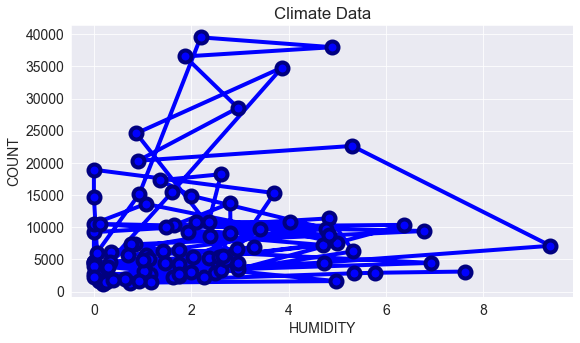

In [1420]:
# First line
plt.plot(df['KARAMA_Rain'], df['Malaria_Counts'], 'b-o', linewidth=4, markersize=12, markeredgewidth=4, markeredgecolor='navy')

# Second line
#plt.plot(years, oranges, 'r--o', linewidth=4, markersize=12,);

# Title
plt.title('Climate Data')

# Line labels
#plt.legend(['Apples', 'Oranges'])

# Axis labels
plt.xlabel('HUMIDITY'); plt.ylabel('COUNT');

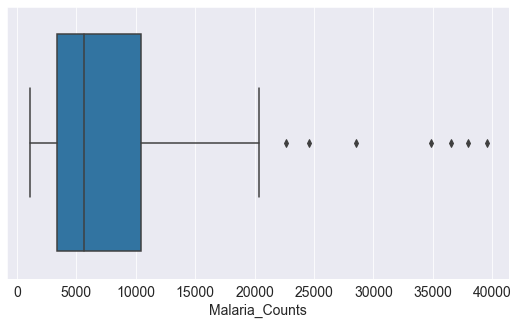

In [1421]:
sns.boxplot(df.Malaria_Counts);

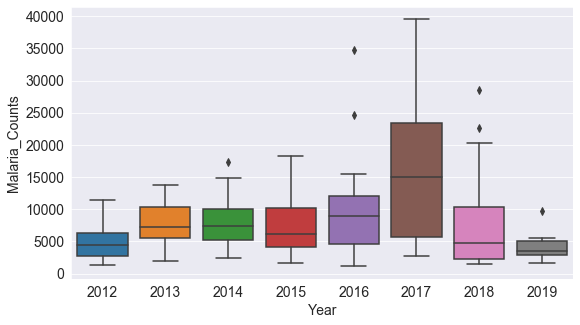

In [1422]:
sns.boxplot(df.Year,df.Malaria_Counts);

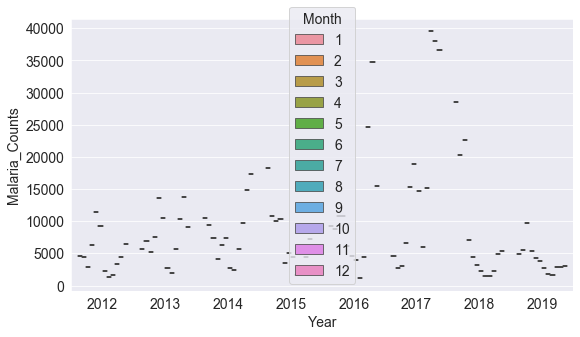

In [1423]:
sns.boxplot(df.Year,df.Malaria_Counts,hue=df.Month);

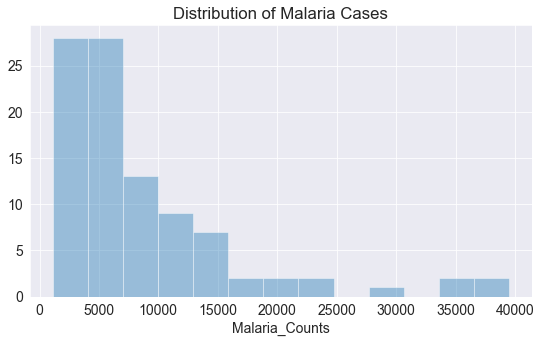

In [1424]:
plt.title("Distribution of Malaria Cases")
sns.distplot(df.Malaria_Counts, kde=False);


In [1425]:
val=df[df['Malaria_Counts']<22000]

In [1426]:
len(val)

89

In [1427]:
val

,MIN_TEMP,MAX_TEMP,AVG_TEMP,KARAMA_Rain,NYAMATA_Rain,JURU_Rain,RAIN_AVG,POPULATION,Year,Month,Malaria_Counts,HUMIDITY,Target
2012-Jan,14.319355,29.206452,21.762903,0.000000,2.580645,1.354839,1.311828,361914,2012,1,4567,NaN,0
2012-Feb,13.251724,27.924138,20.587931,2.551724,2.655172,2.724138,2.643678,361914,2012,2,4497,NaN,0
2012-Mar,14.029032,27.164516,20.596774,2.483871,1.580645,3.677419,2.580645,361914,2012,3,2897,NaN,0
2012-Apr,14.763333,26.276667,20.520000,5.333333,1.400000,7.633333,4.788889,361914,2012,4,6254,NaN,1
2012-May,13.909677,25.887097,19.898387,4.838710,3.258065,5.580645,4.559140,361914,2012,5,11380,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-Aug,15.754839,29.064516,22.409677,0.383871,0.935484,0.254839,0.524731,444235,2019,8,1816,47.925600,0
2019-Sept,16.573333,28.937931,22.755632,0.920000,1.823333,1.393333,1.378889,444235,2019,9,1682,60.598000,0
2019-Oct,16.561290,28.071887,22.316589,5.341935,4.535484,5.561290,5.146237,444235,2019,10,2840,71.666842,0
2019-Nov,16.360000,26.486667,21.423333,5.766667,2.353333,4.273333,4.131111,444235,2019,11,2919,73.379333,0


In [121]:
val['Malaria_Counts'].values.mean()

6746.7191011235955

In [122]:
len(df[df['Malaria_Counts']>=6747])

41

In [123]:
#df['Target']=df['Malaria_Counts'].apply(lambda x:1 if x>=6747 else 0)

In [124]:
len(df)

96

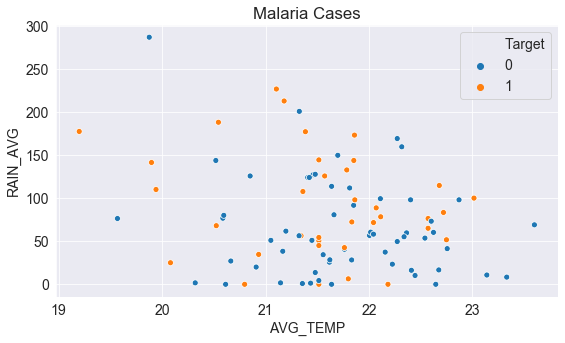

In [125]:
# Create a scatter plot
sns.scatterplot(df.AVG_TEMP, # X-axis
                df.RAIN_AVG,  # Y-axis
                hue=df.Target,  # Dot color
                );

# Chart title
plt.title("Malaria Cases");



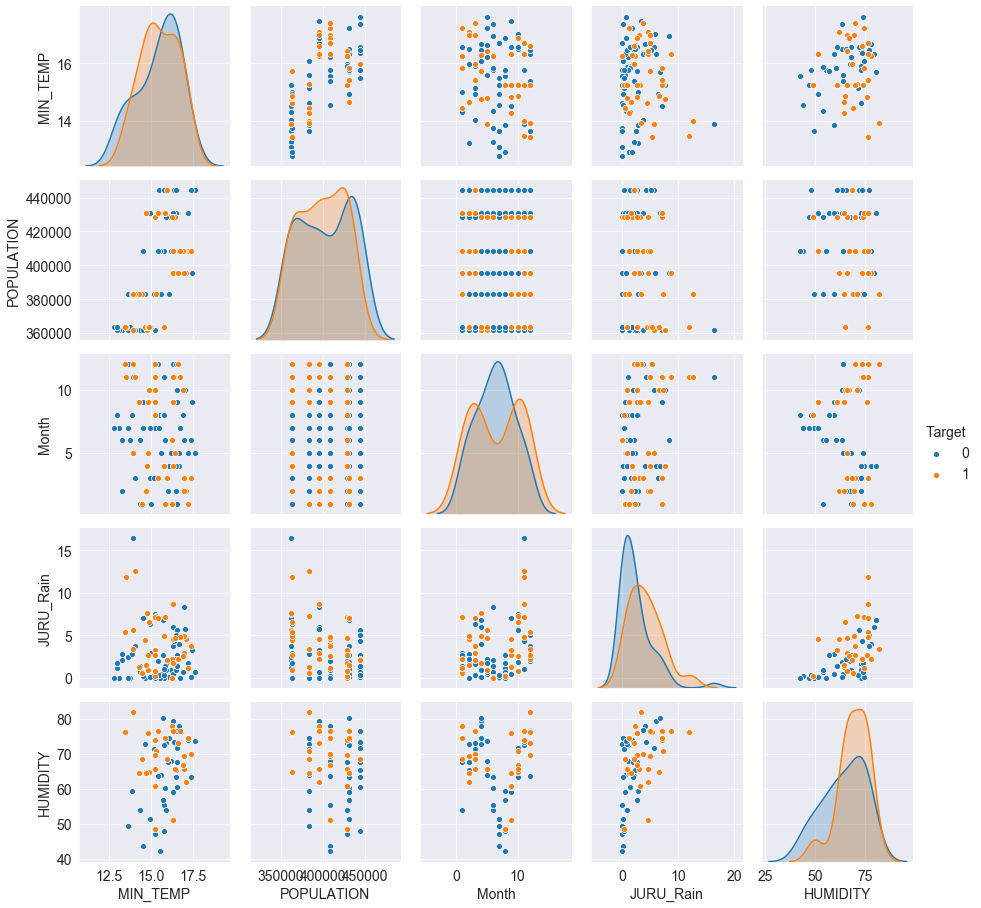

In [1428]:
sns.pairplot(df, vars=['MIN_TEMP','POPULATION','Month','JURU_Rain','HUMIDITY'], hue='Target')

# START TRAINING REGRESSION ALGORITHM

Import packages

In [323]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings('ignore')

In [446]:
def mse(pred,target):
    n=len(pred)
    sum=0
    for i in range(0,n):
        diff=pred[i]-target[i]
        s_diff=diff**2
        sum=sum+s_diff
    MSE=sum/n

    return MSE

In [458]:
df=pd.read_csv('Malaria_Dataset33.csv',index_col=0)
df=df.dropna()
df.head()

,MIN_TEMP,MAX_TEMP,AVG_TEMP,KARAMA_Rain,NYAMATA_Rain,JURU_Rain,RAIN_AVG,POPULATION,Year,Month,Malaria_Counts,HUMIDITY,Target
2013-Sept,14.816667,28.506667,21.661667,2.866667,2.533333,2.666667,2.688889,363339,2013,9,5718,76.047500,1
2013-Oct,14.858065,28.867742,21.862903,1.645161,1.290323,6.548387,3.161290,363339,2013,10,10317,64.919032,1
2013-Nov,13.480000,24.920000,19.200000,2.800000,3.066667,11.866667,5.911111,363339,2013,11,13721,76.136333,1
2013-Dec,13.432258,26.451613,19.941935,2.806452,2.483871,5.354839,3.548387,363339,2013,12,9060,76.251290,1
2014-Jan,14.441935,29.158065,21.800000,0.129032,0.000000,0.483871,0.204301,383016,2014,1,10514,68.648710,1


In [459]:
train_dataset,validate_dataset=train_test_split(df,test_size=0.25,random_state=42)

In [460]:
train_dataset.head()

,MIN_TEMP,MAX_TEMP,AVG_TEMP,KARAMA_Rain,NYAMATA_Rain,JURU_Rain,RAIN_AVG,POPULATION,Year,Month,Malaria_Counts,HUMIDITY,Target
2015-Mar,16.967742,28.174194,22.570968,1.483871,3.032258,2.870968,2.462366,395686,2015,3,10040,65.656667,1
2017-Oct,16.044700,28.378933,21.515423,2.193548,1.419355,0.741935,1.451613,428488,2017,10,39516,65.807667,1
2014-May,15.580645,28.870968,22.225806,1.419355,0.451613,0.387097,0.752688,383016,2014,5,6244,63.862258,0
2014-Mar,15.154839,29.158065,22.156452,0.838710,2.483871,0.290323,1.204301,383016,2014,3,7347,71.490323,0
2016-Aug,15.551613,27.409677,21.480645,0.193548,1.129032,0.000000,0.440860,408357,2016,8,1106,42.086207,0


In [543]:
x_train=train_dataset.drop(['Year','Month','RAIN_AVG','JURU_Rain','POPULATION','NYAMATA_Rain','MIN_TEMP','Target','Malaria_Counts'],axis=1)
x_train.head()

,MAX_TEMP,AVG_TEMP,KARAMA_Rain,HUMIDITY
2015-Mar,28.174194,22.570968,1.483871,65.656667
2017-Oct,28.378933,21.515423,2.193548,65.807667
2014-May,28.870968,22.225806,1.419355,63.862258
2014-Mar,29.158065,22.156452,0.838710,71.490323
2016-Aug,27.409677,21.480645,0.193548,42.086207


In [544]:
y_train=train_dataset.Malaria_Counts
y_train

2015-Mar     10040
2017-Oct     39516
2014-May      6244
2014-Mar      7347
2016-Aug      1106
2014-Jan     10514
2018-Jun      3164
2017-May     15310
2015-Nov      7242
2019-Feb      5503
2019-May      4298
2019-Apr      5411
2018-Aug      1459
2016-Nov     34825
2018-Feb     20339
2019-Nov      2919
2015-Jan     18240
2016-Jul      3948
2016-Jun      4647
2016-Apr     10818
2018-May      4513
2014-Aug      2491
2016-Dec     15514
2019-Aug      1816
2018-Apr      7116
2017-Jul     14726
2016-Sept     4415
2018-Jan     28561
2018-Jul      2243
2013-Oct     10317
2016-Jan      9290
2013-Nov     13721
2018-Nov      4979
2017-Sept    15167
2017-Mar      3054
2018-Oct      2339
2016-Mar     10784
2019-Jan      4886
2014-Jul      2756
2016-Feb      8741
2015-Apr     10367
2019-Mar      9770
2017-Aug      6071
2015-Dec      8682
2019-Jun      3839
2014-Apr      4110
2017-Dec     36547
2014-Dec     17299
2018-Sept     1539
Name: Malaria_Counts, dtype: int64

In [545]:
x_validate=validate_dataset.drop(['Year','Month','RAIN_AVG','JURU_Rain','MIN_TEMP','POPULATION','NYAMATA_Rain','Target','Malaria_Counts'],axis=1)
y_validate=validate_dataset.Malaria_Counts

In [546]:
L_model=LinearRegression(normalize=True)

In [547]:
L_model=L_model.fit(x_train,y_train)
L_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [548]:
pred=L_model.predict(x_validate)
pred

array([13805.15694711,  6101.58642295, 14565.38411269, 12253.84482187,
       10420.92162001,  8318.85786094,  5272.02312454, 12841.48747641,
        8994.47721055,  8163.02778535,  4795.88953925,  8919.67266074,
       10907.58885755, 10528.2866794 , 11219.68605926, 11479.53302048,
       19012.1150868 ])

In [549]:
y_validate.values

array([ 5308,  1682,  5718, 22638,  9412,  2840, 10750,  5619,  3110,
       24595,  4658,  7385, 37986,  9797,  2696,  6218,  9060],
      dtype=int64)

In [550]:
pred2=L_model.predict(x_train)

In [551]:
print("LRegression Accuracy on training set: {:.3f}".format(mse(pred2,y_train)))
print("LRegression Accuracy on test set: {:.3f}".format(mse(pred,y_validate)))

LRegression Accuracy on training set: 66859519.825
LRegression Accuracy on test set: 95953962.488


In [552]:
R_model=Ridge(alpha=10)
model=R_mopred1=model.predict(x_train)
pred2=model.predict(x_validate)
print("LRegression Accuracy on training set: {:.3f}".format(mse(pred1,y_train)))
print("LRegression Accuracy on test set: {:.3f}".format(mse(pred2,y_validate)))del.fit(x_train,y_train)

In [553]:
pred1=model.predict(x_train)
pred2=model.predict(x_validate)
print("LRegression Accuracy on training set: {:.3f}".format(mse(pred1,y_train)))
print("LRegression Accuracy on test set: {:.3f}".format(mse(pred2,y_validate)))

LRegression Accuracy on training set: 67641159.033
LRegression Accuracy on test set: 90147864.462


In [554]:
decision_model = DecisionTreeRegressor(random_state=42,max_depth=5)
model=decision_model.fit(x_train,y_train)
pred1=model.predict(x_train)
pred2=model.predict(x_validate)
print("LRegression Accuracy on training set: {:.3f}".format(mse(pred1,y_train)))
print("LRegression Accuracy on test set: {:.3f}".format(mse(pred2,y_validate)))

LRegression Accuracy on training set: 1384490.594
LRegression Accuracy on test set: 208395136.254


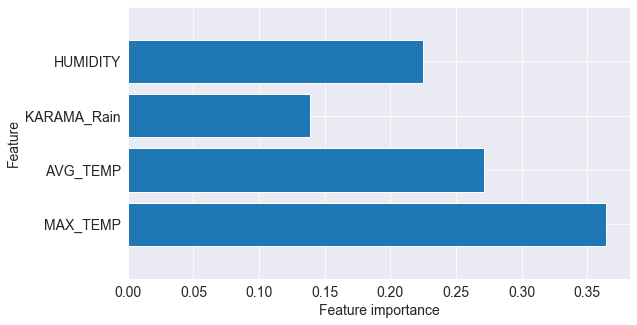

In [555]:
def plot_feature_importances_cancer(model):
    n_features = x_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(model)

In [556]:
f_model = RandomForestRegressor(random_state=42,n_estimators=500)
model=f_model.fit(x_train,y_train)
pred1=model.predict(x_train)
pred2=model.predict(x_validate)
print("LRegression Accuracy on training set: {:.3f}".format(mse(pred1,y_train)))
print("LRegression Accuracy on test set: {:.3f}".format(mse(pred2,y_validate)))

LRegression Accuracy on training set: 7833746.786
LRegression Accuracy on test set: 133443686.313


In [557]:
mean_on_train = x_train.mean(axis=0)
std_on_train = x_train.std(axis=0)
x_train_scaled = (x_train - mean_on_train) / std_on_train
x_validate_scaled = (x_validate - mean_on_train) / std_on_train

n_model=RandomForestRegressor(random_state=1,n_estimators=40)
model=n_model.fit(x_train_scaled, y_train)
pred1=model.predict(x_train)
pred2=model.predict(x_validate)
print("LRegression Accuracy on training set: {:.3f}".format(mse(pred1,y_train)))
print("LRegression Accuracy on test set: {:.3f}".format(mse(pred2,y_validate)))

LRegression Accuracy on training set: 104024572.265
LRegression Accuracy on test set: 112502953.034


In [558]:
g_model= GradientBoostingRegressor()
model=f_model.fit(x_train_scaled,y_train)
pred1=model.predict(x_train)
pred2=model.predict(x_validate)
print("LRegression Accuracy on training set: {:.3f}".format(mse(pred1,y_train)))
print("LRegression Accuracy on test set: {:.3f}".format(mse(pred2,y_validate)))

LRegression Accuracy on training set: 102811279.918
LRegression Accuracy on test set: 108206758.312


In [559]:
k_model=KNeighborsRegressor(n_neighbors=5)
model=k_model.fit(x_train,y_train)
pred1=model.predict(x_train)
pred2=model.predict(x_validate)
print("LRegression Accuracy on training set: {:.3f}".format(mse(pred1,y_train)))
print("LRegression Accuracy on test set: {:.3f}".format(mse(pred2,y_validate)))

LRegression Accuracy on training set: 56927539.042
LRegression Accuracy on test set: 128051684.299


In [560]:
n_model=MLPRegressor(solver='lbfgs',random_state=50,alpha=0.01,max_iter=100,hidden_layer_sizes=[100,100])
model=n_model.fit(x_train_scaled, y_train)
pred1=model.predict(x_train)
pred2=model.predict(x_validate)
print("LRegression Accuracy on training set: {:.3f}".format(mse(pred1,y_train)))
print("LRegression Accuracy on test set: {:.3f}".format(mse(pred2,y_validate)))

LRegression Accuracy on training set: 370294161990.917
LRegression Accuracy on test set: 407507317414.805


# Classifiers

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [531]:
df=pd.read_csv('Malaria_Dataset55.csv',index_col=0)
df=df.dropna()
df.head()

,MIN_TEMP,MAX_TEMP,KARAMA_Rain,NYAMATA_Rain,JURU_Rain,RAIN_AVG,POPULATION,Year,Month,Malaria_Counts,HUMIDITY,Malaria_Ratio,class
2013-Sept,14.816667,28.506667,86.0,76.0,80.0,80.666667,363339,2013,9,5718,76.047500,0.015737,0
2013-Oct,14.858065,28.867742,51.0,40.0,203.0,98.000000,363339,2013,10,10317,64.919032,0.028395,1
2013-Nov,13.480000,24.920000,84.0,92.0,356.0,177.333333,363339,2013,11,13721,76.136333,0.037764,1
2013-Dec,13.432258,26.451613,87.0,77.0,166.0,110.000000,363339,2013,12,9060,76.251290,0.024935,0
2014-Jan,14.441935,29.158065,4.0,0.0,15.0,6.333333,383016,2014,1,10514,68.648710,0.027451,0


In [532]:
len(df)

66

In [533]:
df['TEMP_AVG']=df.loc[:,['MIN_TEMP','MAX_TEMP']].mean(axis=1)

In [534]:
df.head()

,MIN_TEMP,MAX_TEMP,KARAMA_Rain,NYAMATA_Rain,JURU_Rain,RAIN_AVG,POPULATION,Year,Month,Malaria_Counts,HUMIDITY,Malaria_Ratio,class,TEMP_AVG
2013-Sept,14.816667,28.506667,86.0,76.0,80.0,80.666667,363339,2013,9,5718,76.047500,0.015737,0,21.661667
2013-Oct,14.858065,28.867742,51.0,40.0,203.0,98.000000,363339,2013,10,10317,64.919032,0.028395,1,21.862903
2013-Nov,13.480000,24.920000,84.0,92.0,356.0,177.333333,363339,2013,11,13721,76.136333,0.037764,1,19.200000
2013-Dec,13.432258,26.451613,87.0,77.0,166.0,110.000000,363339,2013,12,9060,76.251290,0.024935,0,19.941935
2014-Jan,14.441935,29.158065,4.0,0.0,15.0,6.333333,383016,2014,1,10514,68.648710,0.027451,0,21.800000


In [535]:
train_dataset,validate_dataset=train_test_split(df,test_size=0.25,random_state=42)

In [536]:
x_train=train_dataset.drop(['Year','class','POPULATION','Malaria_Counts','Malaria_Ratio'],axis=1)

In [538]:
#x_train=train_dataset.drop(['Year','NYAMATA_Rain','MIN_TEMP','MAX_TEMP','JURU_Rain','KARAMA_Rain','class','Malaria_Counts','Malaria_Ratio'],axis=1)

In [539]:
#x_train=train_dataset.drop(['Year','class','MIN_TEMP','POPULATION','TEMP_AVG','Malaria_Counts','Malaria_Ratio','KARAMA_Rain','RAIN_AVG','NYAMATA_Rain'],axis=1)
x_train.head()

,MIN_TEMP,MAX_TEMP,KARAMA_Rain,NYAMATA_Rain,JURU_Rain,RAIN_AVG,Month,HUMIDITY,TEMP_AVG
2015-Mar,16.967742,28.174194,46.0,94.0,89.0,76.333333,3,65.656667,22.570968
2017-Oct,16.044700,28.378933,68.0,44.0,23.0,45.000000,10,65.807667,22.211816
2014-May,15.580645,28.870968,44.0,14.0,12.0,23.333333,5,63.862258,22.225806
2014-Mar,15.154839,29.158065,26.0,77.0,9.0,37.333333,3,71.490323,22.156452
2016-Aug,15.551613,27.409677,6.0,35.0,0.0,13.666667,8,42.086207,21.480645


In [540]:
y_train=train_dataset['class']
y_train

2015-Mar     0
2017-Oct     1
2014-May     0
2014-Mar     0
2016-Aug     0
2014-Jan     0
2018-Jun     0
2017-May     1
2015-Nov     0
2019-Feb     0
2019-May     0
2019-Apr     0
2018-Aug     0
2016-Nov     1
2018-Feb     1
2019-Nov     0
2015-Jan     1
2016-Jul     0
2016-Jun     0
2016-Apr     0
2018-May     0
2014-Aug     0
2016-Dec     1
2019-Aug     0
2018-Apr     0
2017-Jul     1
2016-Sept    1
2018-Jan     1
2018-Jul     0
2013-Oct     1
2016-Jan     0
2013-Nov     1
2018-Nov     0
2017-Sept    1
2017-Mar     0
2018-Oct     0
2016-Mar     0
2019-Jan     0
2014-Jul     0
2016-Feb     0
2015-Apr     0
2019-Mar     0
2017-Aug     1
2015-Dec     0
2019-Jun     0
2014-Apr     0
2017-Dec     1
2014-Dec     1
2018-Sept    0
Name: class, dtype: int64

In [541]:
#x_validate=validate_datasetlen(x_train)

In [542]:
x_validate=validate_dataset.drop(['Year','POPULATION','class','Malaria_Counts','Malaria_Ratio'],axis=1)
y_validate=validate_dataset['class']

In [543]:
#

In [544]:
#x_validate=validate_dataset.drop(['Year','MAX_TEMP','HUMIDITY','MIN_TEMP','NYAMATA_Rain','KARAMA_Rain','JURU_Rain','class','Malaria_Counts','Malaria_Ratio'],axis=1)
#y_validate=validate_dataset['class']

In [545]:
len(x_validate)

17

In [546]:
mean_on_train = x_train.mean(axis=0)
std_on_train = x_train.std(axis=0)
x_train_scaled = (x_train - mean_on_train) / std_on_train
x_validate_scaled = (x_validate - mean_on_train) / std_on_train

In [547]:
model=LogisticRegression(max_iter=50,C=0.1)
model

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [548]:
model=model.fit(x_train_scaled,y_train)
print("LRegression Accuracy on training set: {:.3f}".format(model.score(x_train_scaled,y_train)))
print("LRegression Accuracy on test set: {:.3f}".format(model.score(x_validate_scaled,y_validate)))

LRegression Accuracy on training set: 0.735
LRegression Accuracy on test set: 0.824


In [549]:
decision_model = DecisionTreeClassifier(random_state=42,max_depth=3)
model=decision_model.fit(x_train,y_train)
print("LRegression Accuracy on training set: {:.3f}".format(model.score(x_train,y_train)))
print("LRegression Accuracy on test set: {:.3f}".format(model.score(x_validate,y_validate)))

LRegression Accuracy on training set: 0.878
LRegression Accuracy on test set: 0.824


In [550]:
for n in range(50):
    decision_model = DecisionTreeClassifier(random_state=n,max_depth=5)
    model=decision_model.fit(x_train_scaled,y_train)
    print("LRegression Accuracy on training set: {:.3f}".format(model.score(x_train_scaled,y_train)))
    print("LRegression Accuracy on test set: {:.3f}".format(model.score(x_validate_scaled,y_validate)))

LRegression Accuracy on training set: 0.980
LRegression Accuracy on test set: 0.765
LRegression Accuracy on training set: 0.980
LRegression Accuracy on test set: 0.765
LRegression Accuracy on training set: 0.980
LRegression Accuracy on test set: 0.706
LRegression Accuracy on training set: 0.980
LRegression Accuracy on test set: 0.765
LRegression Accuracy on training set: 0.980
LRegression Accuracy on test set: 0.765
LRegression Accuracy on training set: 0.980
LRegression Accuracy on test set: 0.765
LRegression Accuracy on training set: 0.980
LRegression Accuracy on test set: 0.765
LRegression Accuracy on training set: 0.980
LRegression Accuracy on test set: 0.765
LRegression Accuracy on training set: 0.980
LRegression Accuracy on test set: 0.706
LRegression Accuracy on training set: 0.980
LRegression Accuracy on test set: 0.765
LRegression Accuracy on training set: 0.980
LRegression Accuracy on test set: 0.706
LRegression Accuracy on training set: 0.980
LRegression Accuracy on test set

In [551]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=49, splitter='best')

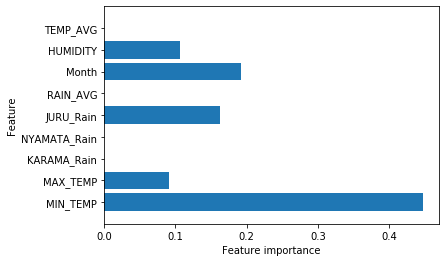

In [552]:
def plot_feature_importances_cancer(model):
    n_features = x_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(model)

In [553]:
x_train=train_dataset.loc[:,['MIN_TEMP','MAX_TEMP','JURU_Rain','Month','HUMIDITY']]
x_validate=validate_dataset.loc[:,['MIN_TEMP','MAX_TEMP','JURU_Rain','Month','HUMIDITY']]

In [ ]:
val=[]
for n in range(15,50):
    for j in range(30):
        f_model = RandomForestClassifier(random_state=j,n_estimators=n)
        model=f_model.fit(x_train,y_train)
        val.append(model.score(x_validate,y_validate))
        print(n,j,"LRegression Accuracy on training set: {:.3f}".format(model.score(x_train,y_train)))
        print(n,j,"LRegression Accuracy on test set: {:.3f}".format(model.score(x_validate,y_validate)))
np.array(val).max()

15 0 LRegression Accuracy on training set: 0.980
15 0 LRegression Accuracy on test set: 0.706
15 1 LRegression Accuracy on training set: 1.000
15 1 LRegression Accuracy on test set: 0.765
15 2 LRegression Accuracy on training set: 0.980
15 2 LRegression Accuracy on test set: 0.765
15 3 LRegression Accuracy on training set: 1.000
15 3 LRegression Accuracy on test set: 0.706
15 4 LRegression Accuracy on training set: 0.959
15 4 LRegression Accuracy on test set: 0.529
15 5 LRegression Accuracy on training set: 1.000
15 5 LRegression Accuracy on test set: 0.706
15 6 LRegression Accuracy on training set: 1.000
15 6 LRegression Accuracy on test set: 0.588
15 7 LRegression Accuracy on training set: 1.000
15 7 LRegression Accuracy on test set: 0.706
15 8 LRegression Accuracy on training set: 1.000
15 8 LRegression Accuracy on test set: 0.706
15 9 LRegression Accuracy on training set: 1.000
15 9 LRegression Accuracy on test set: 0.647
15 10 LRegression Accuracy on training set: 0.959
15 10 LReg

17 29 LRegression Accuracy on training set: 1.000
17 29 LRegression Accuracy on test set: 0.588
18 0 LRegression Accuracy on training set: 0.959
18 0 LRegression Accuracy on test set: 0.706
18 1 LRegression Accuracy on training set: 1.000
18 1 LRegression Accuracy on test set: 0.765
18 2 LRegression Accuracy on training set: 0.980
18 2 LRegression Accuracy on test set: 0.765
18 3 LRegression Accuracy on training set: 1.000
18 3 LRegression Accuracy on test set: 0.706
18 4 LRegression Accuracy on training set: 0.959
18 4 LRegression Accuracy on test set: 0.588
18 5 LRegression Accuracy on training set: 1.000
18 5 LRegression Accuracy on test set: 0.647
18 6 LRegression Accuracy on training set: 1.000
18 6 LRegression Accuracy on test set: 0.588
18 7 LRegression Accuracy on training set: 0.980
18 7 LRegression Accuracy on test set: 0.824
18 8 LRegression Accuracy on training set: 1.000
18 8 LRegression Accuracy on test set: 0.706
18 9 LRegression Accuracy on training set: 0.980
18 9 LReg

20 27 LRegression Accuracy on test set: 0.647
20 28 LRegression Accuracy on training set: 1.000
20 28 LRegression Accuracy on test set: 0.706
20 29 LRegression Accuracy on training set: 1.000
20 29 LRegression Accuracy on test set: 0.588
21 0 LRegression Accuracy on training set: 1.000
21 0 LRegression Accuracy on test set: 0.706
21 1 LRegression Accuracy on training set: 1.000
21 1 LRegression Accuracy on test set: 0.647
21 2 LRegression Accuracy on training set: 1.000
21 2 LRegression Accuracy on test set: 0.706
21 3 LRegression Accuracy on training set: 1.000
21 3 LRegression Accuracy on test set: 0.706
21 4 LRegression Accuracy on training set: 0.959
21 4 LRegression Accuracy on test set: 0.588
21 5 LRegression Accuracy on training set: 1.000
21 5 LRegression Accuracy on test set: 0.647
21 6 LRegression Accuracy on training set: 1.000
21 6 LRegression Accuracy on test set: 0.647
21 7 LRegression Accuracy on training set: 1.000
21 7 LRegression Accuracy on test set: 0.824
21 8 LRegr

23 27 LRegression Accuracy on training set: 1.000
23 27 LRegression Accuracy on test set: 0.647
23 28 LRegression Accuracy on training set: 1.000
23 28 LRegression Accuracy on test set: 0.706
23 29 LRegression Accuracy on training set: 1.000
23 29 LRegression Accuracy on test set: 0.588
24 0 LRegression Accuracy on training set: 0.980
24 0 LRegression Accuracy on test set: 0.706
24 1 LRegression Accuracy on training set: 1.000
24 1 LRegression Accuracy on test set: 0.647
24 2 LRegression Accuracy on training set: 1.000
24 2 LRegression Accuracy on test set: 0.765
24 3 LRegression Accuracy on training set: 1.000
24 3 LRegression Accuracy on test set: 0.706
24 4 LRegression Accuracy on training set: 0.959
24 4 LRegression Accuracy on test set: 0.588
24 5 LRegression Accuracy on training set: 1.000
24 5 LRegression Accuracy on test set: 0.706
24 6 LRegression Accuracy on training set: 1.000
24 6 LRegression Accuracy on test set: 0.647
24 7 LRegression Accuracy on training set: 0.980
24 7 

26 25 LRegression Accuracy on test set: 0.824
26 26 LRegression Accuracy on training set: 1.000
26 26 LRegression Accuracy on test set: 0.765
26 27 LRegression Accuracy on training set: 1.000
26 27 LRegression Accuracy on test set: 0.647
26 28 LRegression Accuracy on training set: 1.000
26 28 LRegression Accuracy on test set: 0.706
26 29 LRegression Accuracy on training set: 1.000
26 29 LRegression Accuracy on test set: 0.647
27 0 LRegression Accuracy on training set: 0.980
27 0 LRegression Accuracy on test set: 0.706
27 1 LRegression Accuracy on training set: 1.000
27 1 LRegression Accuracy on test set: 0.647
27 2 LRegression Accuracy on training set: 1.000
27 2 LRegression Accuracy on test set: 0.647
27 3 LRegression Accuracy on training set: 1.000
27 3 LRegression Accuracy on test set: 0.706
27 4 LRegression Accuracy on training set: 0.980
27 4 LRegression Accuracy on test set: 0.706
27 5 LRegression Accuracy on training set: 1.000
27 5 LRegression Accuracy on test set: 0.706
27 6 L

29 23 LRegression Accuracy on test set: 0.706
29 24 LRegression Accuracy on training set: 1.000
29 24 LRegression Accuracy on test set: 0.706
29 25 LRegression Accuracy on training set: 1.000
29 25 LRegression Accuracy on test set: 0.824
29 26 LRegression Accuracy on training set: 1.000
29 26 LRegression Accuracy on test set: 0.765
29 27 LRegression Accuracy on training set: 1.000
29 27 LRegression Accuracy on test set: 0.588
29 28 LRegression Accuracy on training set: 1.000
29 28 LRegression Accuracy on test set: 0.706
29 29 LRegression Accuracy on training set: 1.000
29 29 LRegression Accuracy on test set: 0.588
30 0 LRegression Accuracy on training set: 1.000
30 0 LRegression Accuracy on test set: 0.706
30 1 LRegression Accuracy on training set: 1.000
30 1 LRegression Accuracy on test set: 0.706
30 2 LRegression Accuracy on training set: 1.000
30 2 LRegression Accuracy on test set: 0.765
30 3 LRegression Accuracy on training set: 1.000
30 3 LRegression Accuracy on test set: 0.706
30

32 21 LRegression Accuracy on training set: 1.000
32 21 LRegression Accuracy on test set: 0.706
32 22 LRegression Accuracy on training set: 1.000
32 22 LRegression Accuracy on test set: 0.647
32 23 LRegression Accuracy on training set: 1.000
32 23 LRegression Accuracy on test set: 0.765
32 24 LRegression Accuracy on training set: 0.980
32 24 LRegression Accuracy on test set: 0.706
32 25 LRegression Accuracy on training set: 1.000
32 25 LRegression Accuracy on test set: 0.824
32 26 LRegression Accuracy on training set: 1.000
32 26 LRegression Accuracy on test set: 0.765
32 27 LRegression Accuracy on training set: 1.000
32 27 LRegression Accuracy on test set: 0.647
32 28 LRegression Accuracy on training set: 1.000
32 28 LRegression Accuracy on test set: 0.706
32 29 LRegression Accuracy on training set: 1.000
32 29 LRegression Accuracy on test set: 0.647
33 0 LRegression Accuracy on training set: 1.000
33 0 LRegression Accuracy on test set: 0.706
33 1 LRegression Accuracy on training set:

35 19 LRegression Accuracy on training set: 1.000
35 19 LRegression Accuracy on test set: 0.647
35 20 LRegression Accuracy on training set: 1.000
35 20 LRegression Accuracy on test set: 0.647
35 21 LRegression Accuracy on training set: 1.000
35 21 LRegression Accuracy on test set: 0.706
35 22 LRegression Accuracy on training set: 1.000
35 22 LRegression Accuracy on test set: 0.706
35 23 LRegression Accuracy on training set: 1.000
35 23 LRegression Accuracy on test set: 0.765
35 24 LRegression Accuracy on training set: 1.000
35 24 LRegression Accuracy on test set: 0.706
35 25 LRegression Accuracy on training set: 1.000
35 25 LRegression Accuracy on test set: 0.824
35 26 LRegression Accuracy on training set: 1.000
35 26 LRegression Accuracy on test set: 0.765
35 27 LRegression Accuracy on training set: 1.000
35 27 LRegression Accuracy on test set: 0.588
35 28 LRegression Accuracy on training set: 1.000
35 28 LRegression Accuracy on test set: 0.706
35 29 LRegression Accuracy on training s

38 16 LRegression Accuracy on training set: 1.000
38 16 LRegression Accuracy on test set: 0.824
38 17 LRegression Accuracy on training set: 1.000
38 17 LRegression Accuracy on test set: 0.765
38 18 LRegression Accuracy on training set: 1.000
38 18 LRegression Accuracy on test set: 0.588
38 19 LRegression Accuracy on training set: 1.000
38 19 LRegression Accuracy on test set: 0.647
38 20 LRegression Accuracy on training set: 1.000
38 20 LRegression Accuracy on test set: 0.588
38 21 LRegression Accuracy on training set: 1.000
38 21 LRegression Accuracy on test set: 0.706
38 22 LRegression Accuracy on training set: 1.000
38 22 LRegression Accuracy on test set: 0.706
38 23 LRegression Accuracy on training set: 1.000
38 23 LRegression Accuracy on test set: 0.765
38 24 LRegression Accuracy on training set: 1.000
38 24 LRegression Accuracy on test set: 0.706
38 25 LRegression Accuracy on training set: 1.000
38 25 LRegression Accuracy on test set: 0.824
38 26 LRegression Accuracy on training s

41 12 LRegression Accuracy on test set: 0.706
41 13 LRegression Accuracy on training set: 1.000
41 13 LRegression Accuracy on test set: 0.765
41 14 LRegression Accuracy on training set: 1.000
41 14 LRegression Accuracy on test set: 0.706
41 15 LRegression Accuracy on training set: 1.000
41 15 LRegression Accuracy on test set: 0.647
41 16 LRegression Accuracy on training set: 1.000
41 16 LRegression Accuracy on test set: 0.765
41 17 LRegression Accuracy on training set: 1.000
41 17 LRegression Accuracy on test set: 0.765
41 18 LRegression Accuracy on training set: 1.000
41 18 LRegression Accuracy on test set: 0.588
41 19 LRegression Accuracy on training set: 1.000
41 19 LRegression Accuracy on test set: 0.647
41 20 LRegression Accuracy on training set: 1.000
41 20 LRegression Accuracy on test set: 0.588
41 21 LRegression Accuracy on training set: 1.000
41 21 LRegression Accuracy on test set: 0.706
41 22 LRegression Accuracy on training set: 1.000
41 22 LRegression Accuracy on test set: 

44 9 LRegression Accuracy on training set: 1.000
44 9 LRegression Accuracy on test set: 0.588
44 10 LRegression Accuracy on training set: 1.000
44 10 LRegression Accuracy on test set: 0.588
44 11 LRegression Accuracy on training set: 1.000
44 11 LRegression Accuracy on test set: 0.765
44 12 LRegression Accuracy on training set: 1.000
44 12 LRegression Accuracy on test set: 0.765
44 13 LRegression Accuracy on training set: 1.000
44 13 LRegression Accuracy on test set: 0.706
44 14 LRegression Accuracy on training set: 1.000
44 14 LRegression Accuracy on test set: 0.706
44 15 LRegression Accuracy on training set: 1.000
44 15 LRegression Accuracy on test set: 0.647
44 16 LRegression Accuracy on training set: 1.000
44 16 LRegression Accuracy on test set: 0.765
44 17 LRegression Accuracy on training set: 1.000
44 17 LRegression Accuracy on test set: 0.765
44 18 LRegression Accuracy on training set: 1.000
44 18 LRegression Accuracy on test set: 0.706
44 19 LRegression Accuracy on training set

47 5 LRegression Accuracy on training set: 1.000
47 5 LRegression Accuracy on test set: 0.706
47 6 LRegression Accuracy on training set: 1.000
47 6 LRegression Accuracy on test set: 0.706
47 7 LRegression Accuracy on training set: 1.000
47 7 LRegression Accuracy on test set: 0.765
47 8 LRegression Accuracy on training set: 1.000
47 8 LRegression Accuracy on test set: 0.647
47 9 LRegression Accuracy on training set: 1.000
47 9 LRegression Accuracy on test set: 0.647
47 10 LRegression Accuracy on training set: 1.000
47 10 LRegression Accuracy on test set: 0.588
47 11 LRegression Accuracy on training set: 1.000
47 11 LRegression Accuracy on test set: 0.706
47 12 LRegression Accuracy on training set: 1.000
47 12 LRegression Accuracy on test set: 0.765
47 13 LRegression Accuracy on training set: 1.000
47 13 LRegression Accuracy on test set: 0.706
47 14 LRegression Accuracy on training set: 1.000
47 14 LRegression Accuracy on test set: 0.706
47 15 LRegression Accuracy on training set: 1.000


In [462]:
np.array(val).argmax()

1

In [463]:
f_model = RandomForestClassifier(random_state=17,n_estimators=17)
model=f_model.fit(x_train,y_train)
val.append(model.score(x_validate,y_validate))
print(n,j,"LRegression Accuracy on training set: {:.3f}".format(model.score(x_train,y_train)))
print(n,j,"LRegression Accuracy on test set: {:.3f}".format(model.score(x_validate,y_validate)))

49 29 LRegression Accuracy on training set: 1.000
49 29 LRegression Accuracy on test set: 0.588


In [464]:
f_model = RandomForestClassifier(random_state=2,n_estimators=5)
model=f_model.fit(x_train_scaled,y_train)
print("LRegression Accuracy on training set: {:.3f}".format(model.score(x_train_scaled,y_train)))
print("LRegression Accuracy on test set: {:.3f}".format(model.score(x_validate_scaled,y_validate)))

LRegression Accuracy on training set: 0.898
LRegression Accuracy on test set: 0.765


In [465]:
g_model= GradientBoostingClassifier()
model=f_model.fit(x_train,y_train)
print("LRegression Accuracy on training set: {:.3f}".format(model.score(x_train,y_train)))
print("LRegression Accuracy on test set: {:.3f}".format(model.score(x_validate,y_validate)))

LRegression Accuracy on training set: 0.898
LRegression Accuracy on test set: 0.765


In [466]:
g_model= GradientBoostingClassifier()
model=f_model.fit(x_train_scaled,y_train)
print("LRegression Accuracy on training set: {:.3f}".format(model.score(x_train_scaled,y_train)))
print("LRegression Accuracy on test set: {:.3f}".format(model.score(x_validate_scaled,y_validate)))

LRegression Accuracy on training set: 0.898
LRegression Accuracy on test set: 0.765


In [467]:
k_model=KNeighborsClassifier(n_neighbors=3)
model=k_model.fit(x_train,y_train)
print("LRegression Accuracy on training set: {:.3f}".format(model.score(x_train,y_train)))
print("LRegression Accuracy on test set: {:.3f}".format(model.score(x_validate,y_validate)))

LRegression Accuracy on training set: 0.776
LRegression Accuracy on test set: 0.824


In [468]:
for n in range(1,15):
    k_model=KNeighborsClassifier(n_neighbors=n)
    model=k_model.fit(x_train_scaled,y_train)
    print("LRegression Accuracy on training set: {:.3f}".format(model.score(x_train_scaled,y_train)))
    print("LRegression Accuracy on test set: {:.3f}".format(model.score(x_validate_scaled,y_validate)))

LRegression Accuracy on training set: 1.000
LRegression Accuracy on test set: 0.647
LRegression Accuracy on training set: 0.796
LRegression Accuracy on test set: 0.706
LRegression Accuracy on training set: 0.816
LRegression Accuracy on test set: 0.588
LRegression Accuracy on training set: 0.796
LRegression Accuracy on test set: 0.647
LRegression Accuracy on training set: 0.776
LRegression Accuracy on test set: 0.706
LRegression Accuracy on training set: 0.776
LRegression Accuracy on test set: 0.706
LRegression Accuracy on training set: 0.816
LRegression Accuracy on test set: 0.706
LRegression Accuracy on training set: 0.714
LRegression Accuracy on test set: 0.765
LRegression Accuracy on training set: 0.735
LRegression Accuracy on test set: 0.706
LRegression Accuracy on training set: 0.755
LRegression Accuracy on test set: 0.765
LRegression Accuracy on training set: 0.755
LRegression Accuracy on test set: 0.647
LRegression Accuracy on training set: 0.735
LRegression Accuracy on test set

In [469]:
for n in range(20):
    n_model=MLPClassifier(solver='lbfgs',max_iter=10000, alpha=0.1,random_state=n,hidden_layer_sizes=[50])
    model=n_model.fit(x_train, y_train)
    print("LRegression Accuracy on training set: {:.3f}".format(model.score(x_train,y_train)))
    print("LRegression Accuracy on test set: {:.3f}".format(model.score(x_validate,y_validate)))

LRegression Accuracy on training set: 0.449
LRegression Accuracy on test set: 0.529
LRegression Accuracy on training set: 0.694
LRegression Accuracy on test set: 0.765
LRegression Accuracy on training set: 0.694
LRegression Accuracy on test set: 0.765
LRegression Accuracy on training set: 0.694
LRegression Accuracy on test set: 0.824
LRegression Accuracy on training set: 0.694
LRegression Accuracy on test set: 0.765
LRegression Accuracy on training set: 0.939
LRegression Accuracy on test set: 0.647
LRegression Accuracy on training set: 0.837
LRegression Accuracy on test set: 0.765
LRegression Accuracy on training set: 0.694
LRegression Accuracy on test set: 0.765
LRegression Accuracy on training set: 0.694
LRegression Accuracy on test set: 0.765
LRegression Accuracy on training set: 0.939
LRegression Accuracy on test set: 0.647
LRegression Accuracy on training set: 0.510
LRegression Accuracy on test set: 0.706
LRegression Accuracy on training set: 0.694
LRegression Accuracy on test set

In [470]:
for n in range(1,20):
    n_model=MLPClassifier(solver='lbfgs',max_iter=10000, alpha=0.01,random_state=1,hidden_layer_sizes=[n])
    model=n_model.fit(x_train_scaled, y_train)
    print("LRegression Accuracy on training set: {:.3f}".format(model.score(x_train_scaled,y_train)))
    print("LRegression Accuracy on test set: {:.3f}".format(model.score(x_validate_scaled,y_validate)))

LRegression Accuracy on training set: 0.735
LRegression Accuracy on test set: 0.471
LRegression Accuracy on training set: 0.796
LRegression Accuracy on test set: 0.588
LRegression Accuracy on training set: 0.878
LRegression Accuracy on test set: 0.824
LRegression Accuracy on training set: 0.796
LRegression Accuracy on test set: 0.706
LRegression Accuracy on training set: 0.857
LRegression Accuracy on test set: 0.647
LRegression Accuracy on training set: 0.959
LRegression Accuracy on test set: 0.765
LRegression Accuracy on training set: 0.959
LRegression Accuracy on test set: 0.529
LRegression Accuracy on training set: 0.980
LRegression Accuracy on test set: 0.824
LRegression Accuracy on training set: 0.878
LRegression Accuracy on test set: 0.647
LRegression Accuracy on training set: 1.000
LRegression Accuracy on test set: 0.588
LRegression Accuracy on training set: 1.000
LRegression Accuracy on test set: 0.647
LRegression Accuracy on training set: 1.000
LRegression Accuracy on test set

In [141]:
x_train.shape

(49, 5)

# DATA VISUALIZATION

In [555]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [556]:
data=pd.read_csv('Malaria_Dataset55.csv')
data.head()

,Unnamed: 0,MIN_TEMP,MAX_TEMP,KARAMA_Rain,NYAMATA_Rain,JURU_Rain,RAIN_AVG,POPULATION,Year,Month,Malaria_Counts,HUMIDITY,Malaria_Ratio,class
0,2012-Jan,14.319355,29.206452,0.0,80.0,42.0,40.666667,361914,2012,1,4567,NaN,0.012619,0
1,2012-Feb,13.251724,27.924138,74.0,77.0,79.0,76.666667,361914,2012,2,4497,NaN,0.012426,0
2,2012-Mar,14.029032,27.164516,77.0,49.0,114.0,80.000000,361914,2012,3,2897,NaN,0.008005,0
3,2012-Apr,14.763333,26.276667,160.0,42.0,229.0,143.666667,361914,2012,4,6254,NaN,0.017280,0
4,2012-May,13.909677,25.887097,150.0,101.0,173.0,141.333333,361914,2012,5,11380,NaN,0.031444,0


In [557]:
d={1:'January',2:'February',3:'Mars',4:'April',5:'May',6:'June',
   7:'July',8:'August',9:'Septemper',10:'October',11:'November',12:'December'}

In [558]:
d[1]

'January'

In [559]:
data['month']=data['Month'].apply(lambda x:d.get(x))
data.head()

,Unnamed: 0,MIN_TEMP,MAX_TEMP,KARAMA_Rain,NYAMATA_Rain,JURU_Rain,RAIN_AVG,POPULATION,Year,Month,Malaria_Counts,HUMIDITY,Malaria_Ratio,class,month
0,2012-Jan,14.319355,29.206452,0.0,80.0,42.0,40.666667,361914,2012,1,4567,NaN,0.012619,0,January
1,2012-Feb,13.251724,27.924138,74.0,77.0,79.0,76.666667,361914,2012,2,4497,NaN,0.012426,0,February
2,2012-Mar,14.029032,27.164516,77.0,49.0,114.0,80.000000,361914,2012,3,2897,NaN,0.008005,0,Mars
3,2012-Apr,14.763333,26.276667,160.0,42.0,229.0,143.666667,361914,2012,4,6254,NaN,0.017280,0,April
4,2012-May,13.909677,25.887097,150.0,101.0,173.0,141.333333,361914,2012,5,11380,NaN,0.031444,0,May


In [560]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['figure.figsize']=(9,4)
matplotlib.rcParams['figure.facecolor']='#00000000'

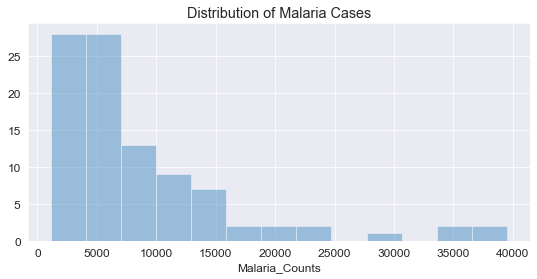

In [561]:
plt.title("Distribution of Malaria Cases")
sns.distplot(data.Malaria_Counts, kde=False);

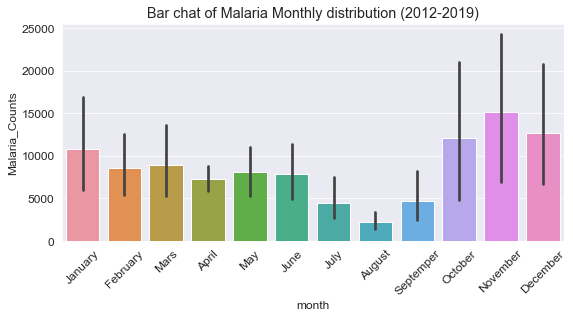

In [562]:
plt.title("Bar chat of Malaria Monthly distribution (2012-2019)")
plt.xticks(rotation=45)
sns.barplot(x="month", y="Malaria_Counts" ,data=data);

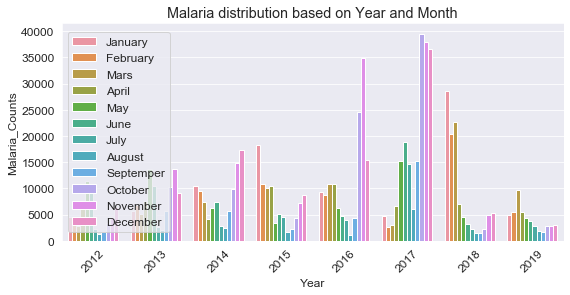

In [563]:
plt.title("Malaria distribution based on Year and Month")
plt.xticks(rotation=45)
sns.barplot(x="Year", y="Malaria_Counts" ,hue='month',data=data);
plt.legend(loc=6)

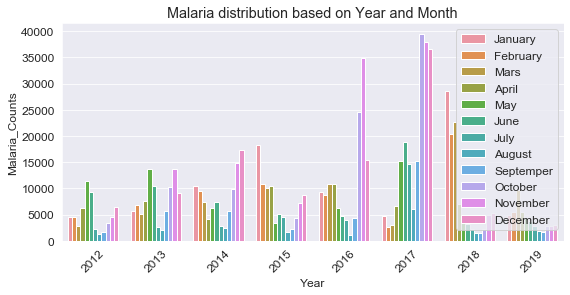

In [564]:
plt.title("Malaria distribution based on Year and Month")
plt.xticks(rotation=45)
sns.barplot(x="Year", y="Malaria_Counts" ,hue='month',data=data);
plt.legend(loc=1)

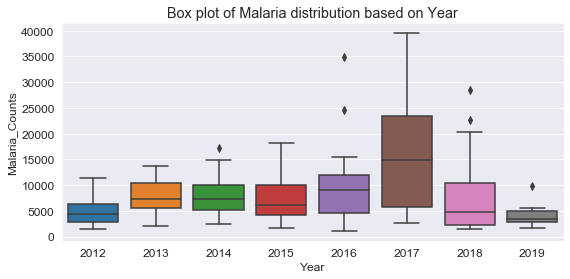

In [565]:
plt.title("Box plot of Malaria distribution based on Year")
sns.boxplot(data.Year,data.Malaria_Counts);

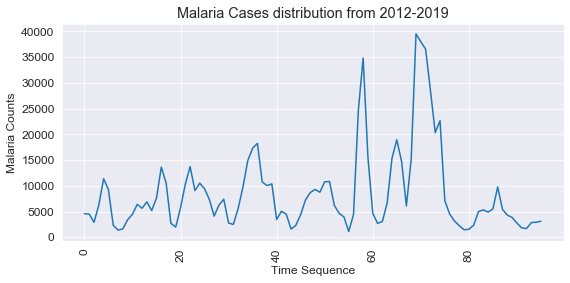

In [566]:
plt.title("Malaria Cases distribution from 2012-2019")
plt.xlabel('Time Sequence')
plt.ylabel('Malaria Counts')
plt.xticks(rotation=90)
plt.plot(data.Malaria_Counts)

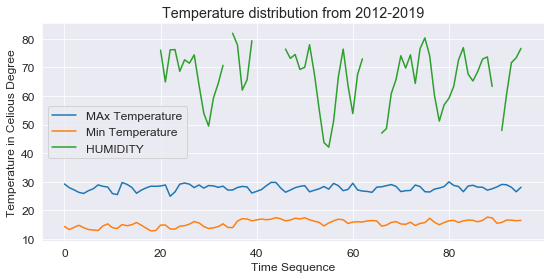

In [567]:
plt.title("Temperature distribution from 2012-2019")
plt.xlabel('Time Sequence')
plt.ylabel('Temperature in Celious Degree')
plt.xticks(rotation=0)
plt.plot(data.MAX_TEMP)
plt.plot(data.MIN_TEMP)
plt.plot(data.HUMIDITY)
plt.legend(['MAx Temperature','Min Temperature','HUMIDITY'],loc='best')

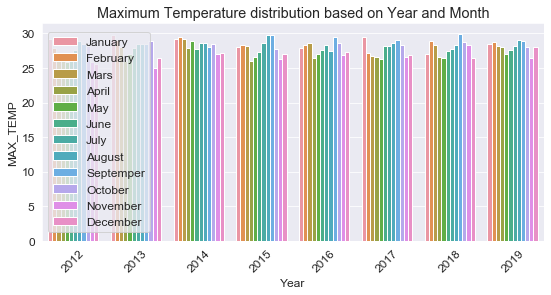

In [568]:
plt.title("Maximum Temperature distribution based on Year and Month")
plt.xticks(rotation=45)
sns.barplot(x="Year", y="MAX_TEMP" ,hue='month',data=data);
plt.legend(loc=6)

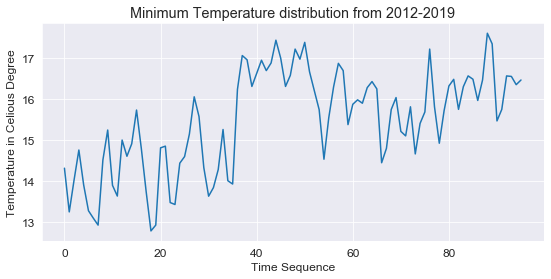

In [569]:
plt.title("Minimum Temperature distribution from 2012-2019")
plt.xlabel('Time Sequence')
plt.ylabel('Temperature in Celious Degree')
plt.xticks(rotation=0)
plt.plot(data.MIN_TEMP)

Text(0, 0.5, 'POPULATION SIZE')

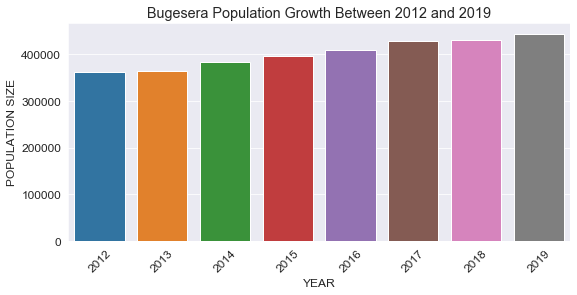

In [570]:
plt.title("Bugesera Population Growth Between 2012 and 2019")
plt.xticks(rotation=45)
sns.barplot(x="Year", y="POPULATION" ,data=data);
plt.xlabel('YEAR')
plt.ylabel('POPULATION SIZE')

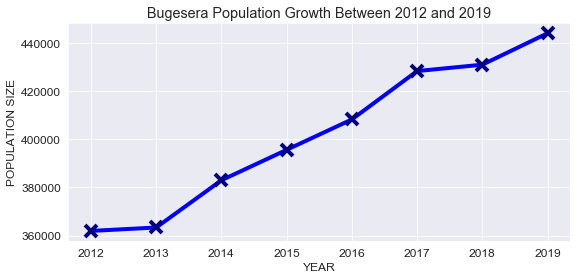

In [571]:
years=range(2012,2020)
plt.title("Bugesera Population Growth Between 2012 and 2019")
plt.xlabel('YEAR')
plt.ylabel('POPULATION SIZE')
plt.xticks(rotation=0)
# First line
plt.plot(years, data.POPULATION.unique(), 'b-x', linewidth=4, markersize=12, markeredgewidth=4, markeredgecolor='navy')


In [572]:
data=data.dropna()

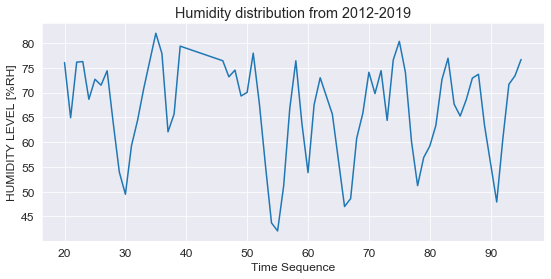

In [573]:
plt.title("Humidity distribution from 2012-2019")
plt.xlabel('Time Sequence')
plt.ylabel('HUMIDITY LEVEL [%RH]')
plt.xticks(rotation=0)
plt.plot(data.HUMIDITY)

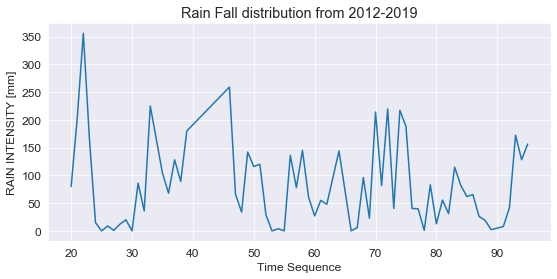

In [574]:
plt.title("Rain Fall distribution from 2012-2019")
plt.xlabel('Time Sequence')
plt.ylabel('RAIN INTENSITY [mm]')
plt.xticks(rotation=0)
plt.plot(data.JURU_Rain)

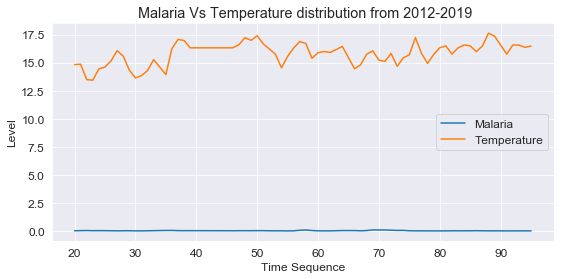

In [115]:
plt.title(" Malaria Vs Temperature distribution from 2012-2019")
plt.xlabel('Time Sequence')
plt.ylabel('Level')
plt.xticks(rotation=0)
plt.plot(data.Malaria_Ratio)
plt.plot(data.MIN_TEMP)
plt.legend(['Malaria','Temperature'],loc='best')

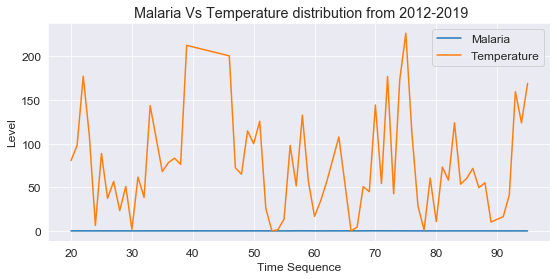

In [116]:
plt.title(" Malaria Vs Temperature distribution from 2012-2019")
plt.xlabel('Time Sequence')
plt.ylabel('Level')
plt.xticks(rotation=0)
plt.plot(data.Malaria_Ratio)
plt.plot(data.RAIN_AVG)
plt.legend(['Malaria','Temperature'],loc='best')

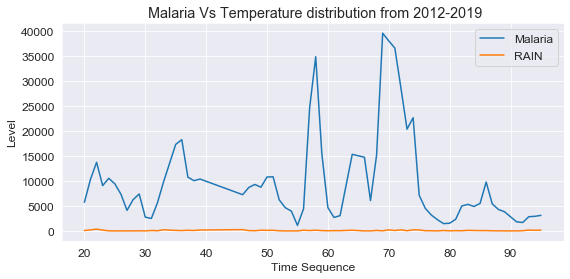

In [117]:
plt.title(" Malaria Vs Temperature distribution from 2012-2019")
plt.xlabel('Time Sequence')
plt.ylabel('Level')
plt.xticks(rotation=0)
plt.plot(data.Malaria_Counts)
plt.plot(data.JURU_Rain)
plt.legend(['Malaria','RAIN'],loc='best')

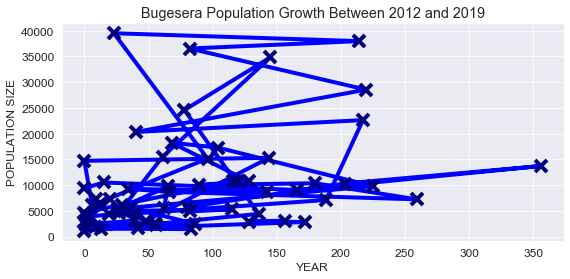

In [118]:
years=range(2012,2020)
plt.title("Bugesera Population Growth Between 2012 and 2019")
plt.xlabel('YEAR')
plt.ylabel('POPULATION SIZE')
plt.xticks(rotation=0)
# First line
plt.plot(data.JURU_Rain, data.Malaria_Counts, 'b-x', linewidth=4, markersize=12, markeredgewidth=4, markeredgecolor='navy')
